In [2]:
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
#import enchant
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import time
import xml.etree.cElementTree as ET
import stop_words
from sklearn.utils import shuffle
%matplotlib inline

In [3]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [4]:
tree = ET.ElementTree(file="laba2_file.xml")
root = tree.getroot()

In [5]:
articles = []
catalog=root[0][0]
for i in range(50):
    articles.append(catalog[i].text)
catalog=root[0][1]
for i in range(50,100):
    articles.append(catalog[i-50].text)
catalog=root[0][2]
for i in range(100,150):
    articles.append(catalog[i-100].text)
catalog=root[0][3]
for i in range(150,200):
    articles.append(catalog[i-150].text)

In [6]:
len(articles)

200

In [7]:
articles[50]=articles[40]
articles[50]

'минэкономразвит выступ изменен действ порядк сдач экзамен водительск прав пишет коммерсант ссылк заключен ведомств оценк министерств нов прав привест лишн затрат автошкол числ государствен высок нагрузк инспектор гибдд инициатив мвд сдач экзам площадк автошкол городск услов планир объедин остав город случа отмеча минэкономразвит времен затрат сдач пересдач экзамен существен возрастут пересдава разн дисциплин отдельн получ пострада автошкол оборудован площадок согласн принят норматив школ должн специальн оборудова территор площад гектар понесен расход окуп обернут убытк чувствительн государствен школ случа убытк понесет бюджетн систем минэкономразвит предлож мвд доработа дета реформ автор очеред обеща дат детальн ответ претенз важн новост лент дня подписыва'

In [8]:
initial_categories = []
for i in range(50):
    initial_categories.append(0)
for i in range(50,100):
    initial_categories.append(1)
for i in range(100,150):
    initial_categories.append(2)
for i in range(150,200):
    initial_categories.append(3)

In [9]:
initial_categories

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [10]:
len(initial_categories)

200

In [11]:
articles, initial_categories = shuffle(articles, initial_categories, random_state=0)

In [12]:
print(initial_categories)

[0, 3, 2, 1, 3, 3, 0, 2, 0, 3, 1, 2, 3, 3, 1, 0, 0, 2, 0, 1, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 0, 1, 3, 2, 0, 3, 2, 0, 1, 2, 2, 1, 0, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3, 1, 2, 0, 0, 3, 0, 1, 2, 1, 3, 0, 3, 1, 1, 3, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 3, 0, 2, 3, 2, 1, 0, 1, 2, 3, 0, 0, 3, 1, 3, 3, 3, 2, 1, 2, 3, 3, 1, 0, 1, 2, 1, 1, 3, 0, 1, 0, 0, 1, 0, 3, 0, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 3, 3, 0, 1, 1, 2, 3, 3, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 3, 0, 2, 2, 3, 0, 0, 2, 1, 3, 2, 0, 0, 2, 3, 0, 3, 2, 3, 0, 2, 3, 2, 0, 1, 1, 1, 2, 2, 3, 1, 1, 0, 3, 1, 3, 3, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 3, 2, 0, 3]


In [13]:
print(articles[0])

крупн последн год алмаз найд месторожден горнообогатительн комбинат говор сообщен алмазодобыва компан алрос отмеча масс добыт алмаз размер миллиметр составля карат камен прозрачн незначительн желтоват оттенк фот алрос алрос рассказа сопоставим размер алмаз найд половин слов директор един сбытов организац алрос евген агуреев подобн находк крупн алмаз подтвержда запас кимберлитов трубк удачн наход достаточн уникальн драгоцен сыр трубк удачн месторожден алмаз север якут открыт относ числ крупн корен месторожден росс рубеж ран министерств природ спрогнозирова дефиц алмаз росс аналитик ведомств связыва истощен действ месторожден важн новост лент дня подписыва


In [14]:
print(len(initial_categories))

200


In [15]:
russian_stop_words=stop_words.get_stop_words('ru')
vectorizer = TfidfVectorizer(stop_words=russian_stop_words) 

In [16]:
ng_train= []
for i in range(160):
    ng_train.append(articles[i])

In [17]:
ng_train[102]

'минэкономразвит выступ изменен действ порядк сдач экзамен водительск прав пишет коммерсант ссылк заключен ведомств оценк министерств нов прав привест лишн затрат автошкол числ государствен высок нагрузк инспектор гибдд инициатив мвд сдач экзам площадк автошкол городск услов планир объедин остав город случа отмеча минэкономразвит времен затрат сдач пересдач экзамен существен возрастут пересдава разн дисциплин отдельн получ пострада автошкол оборудован площадок согласн принят норматив школ должн специальн оборудова территор площад гектар понесен расход окуп обернут убытк чувствительн государствен школ случа убытк понесет бюджетн систем минэкономразвит предлож мвд доработа дета реформ автор очеред обеща дат детальн ответ претенз важн новост лент дня подписыва'

In [18]:
ng_train_target= []
for i in range(160):
    ng_train_target.append(initial_categories[i])

In [19]:
data_train = []
y_train = []
res=list(zip(ng_train, ng_train_target))

for data, lbl in log_progress(res):
    filtered = re.findall(u'(?u)\\b\\w\\w+\\b', data)
    filtered = [filt for filt in filtered ]
    data_train.append(' '.join(filtered).lower())
    y_train.append(lbl)
    
y_train = np.asarray(y_train)
    
print(len(data_train), len(y_train))
print(data_train)

160 160
['крупн последн год алмаз найд месторожден горнообогатительн комбинат говор сообщен алмазодобыва компан алрос отмеча масс добыт алмаз размер миллиметр составля карат камен прозрачн незначительн желтоват оттенк фот алрос алрос рассказа сопоставим размер алмаз найд половин слов директор един сбытов организац алрос евген агуреев подобн находк крупн алмаз подтвержда запас кимберлитов трубк удачн наход достаточн уникальн драгоцен сыр трубк удачн месторожден алмаз север якут открыт относ числ крупн корен месторожден росс рубеж ран министерств природ спрогнозирова дефиц алмаз росс аналитик ведомств связыва истощен действ месторожден важн новост лент дня подписыва', 'российск застройщик сокраща площад квартир жил дом сохран повыш стоимост прогноз содерж материал групп компан метраж поступ редакц начал го использован так прием улич производител продукт бурн обществен реакц частност вызва появлен полк магазин упаковок яиц вмест обычн десятк недвижим дорог востребова продукт росс поэт стр

In [20]:
ng_test= []
for i in range(160,200):
    ng_test.append(articles[i])

In [21]:
ng_test_target= []
for i in range(160,200):
    ng_test_target.append(initial_categories[i])

In [22]:
ng_test_target

[2,
 3,
 0,
 3,
 2,
 3,
 0,
 2,
 3,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 0,
 3,
 1,
 3,
 3,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 3,
 2,
 0,
 3]

In [23]:
data_test = []
y_test = []
res=list(zip(ng_test, ng_test_target))

for data, lbl in log_progress(res):
    filtered = re.findall(u'(?u)\\b\\w\\w+\\b', data)
    filtered = [filt for filt in filtered]
    data_test.append(' '.join(filtered).lower())
    y_test.append(lbl)
    
y_test = np.asarray(y_test)
    
print(len(data_test), len(y_test))

40 40


In [84]:
X_train = vectorizer.fit_transform(data_train)
X_test = vectorizer.transform(data_test)

print(X_train.shape, X_test.shape)

(160, 8042) (40, 8042)


In [25]:
X_train

<160x8042 sparse matrix of type '<class 'numpy.float64'>'
	with 26941 stored elements in Compressed Sparse Row format>

In [26]:
X_test

<40x8042 sparse matrix of type '<class 'numpy.float64'>'
	with 6806 stored elements in Compressed Sparse Row format>

In [27]:
predictor_lr = LogisticRegression().fit(X_train, y_train)

In [28]:
predictor_svm = LinearSVC().fit(X_train, y_train)

In [29]:
predictor_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [30]:
predictor_gbt = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

In [31]:
y_pred_lr = predictor_lr.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr), 2)))

LR accuracy: 0.82%


In [32]:
y_pred_svm = predictor_svm.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_svm), 2)))

LR accuracy: 0.9%


In [33]:
y_pred_svm

array([2, 3, 0, 3, 2, 3, 0, 2, 3, 2, 0, 1, 1, 1, 2, 2, 3, 1, 1, 0, 3, 0,
       3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 3, 2, 0, 3])

In [86]:
ng_test[24]  

'генеральн директор почт росс никола приобрел москв апартамент элитн жил комплекс сообща ссылк выписк един государствен реестр недвижим имеет распоряжен издан сведен площад куплен недвижим составля квадратн метр рыночн стоимост метр жил комплекс достига миллион рубл так образ рыночн стоимост квартир глав почт росс превыша миллиард рубл пишет издан жил глав почт росс располож одн четырех входя комплекс малоэтажн корпус назва застройщик особняк уточня материал никола руковод почт росс июл должност генеральн директор предприят пришел работ пост заместител министр экономическ развит росс лет го раскритикова спикер совет федерац валентин матвиенк причин недовольств факт глав почт росс ориентир размер заработн плат подчинен стыдн руководител почт росс вообщ владеет информац царск дел наверн почтальон занима матвиенк стро столичн район хамовник информац сайт проект стоимост квартир жил комплекс начина рубл жил комплекс фигурирова дел мошенничеств недвижим основа бывш депутат госдум ильдар ком

In [87]:
ng_test[26] 1 2

'международн групп учен коллаборац руководств физик японск институт вперв получ ядр экзотическ атом состоя протон каон частиц содержа стран антикварк сообща каон явля короткоживущ мезон частиц состоя равн количеств кварк антикварк связа сильн взаимодейств антикварк состав каон облада квантов числ произвольн назва странност стран кварк каон содержат верхн нижн кварк тип мезон предсказа японск физик хидэк учен получ нобелевск прем существован каон подтвержд ход эксперимент физик использова ядр гел состоя протон нейтрон учен выб нейтрон гел сам уменьш энерг каон помощ энерг отдач ядр позвол связа стран мезон изначальн явля виртуальн частиц протон сдела реальн слов исследовател результат работ помогут поня механизм происхожден масс ядер процесс происходя недр нейтрон звезд важн новост лент дня подписыва'

In [34]:
y_pred_rf = predictor_rf.predict(X_test)
print ('RF accuracy: {}%'.format(round(np.mean(y_test == y_pred_rf), 2)))

RF accuracy: 0.85%


In [35]:
y_pred_rf

array([2, 3, 0, 3, 2, 3, 0, 1, 3, 2, 0, 1, 1, 1, 2, 2, 3, 1, 1, 0, 3, 1,
       3, 3, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 3, 1, 0, 3])

In [36]:
y_pred_gbt = predictor_gbt.predict(X_test)
print ('GBT accuracy: {}%'.format(round(np.mean(y_test == y_pred_gbt), 2)))

GBT accuracy: 0.75%


In [37]:
initial_categories1=['Russia','Economics', 'Science', 'Home']

In [38]:
def plot_confusion_matrix(cm, title='Contingency matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    classes = [x.split('.')[-1] for x in initial_categories1]
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

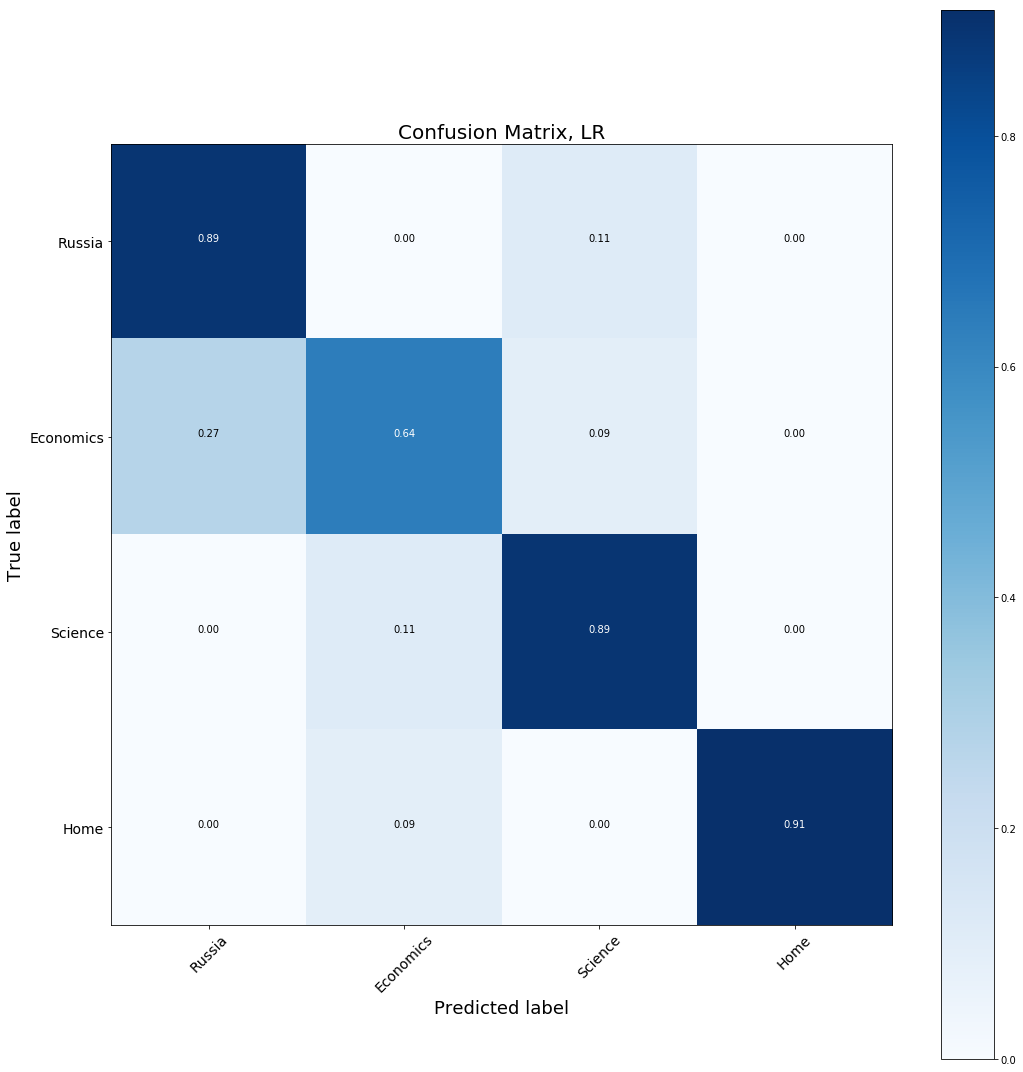

In [39]:
cmt_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cmt_lr, title='Confusion Matrix, LR')

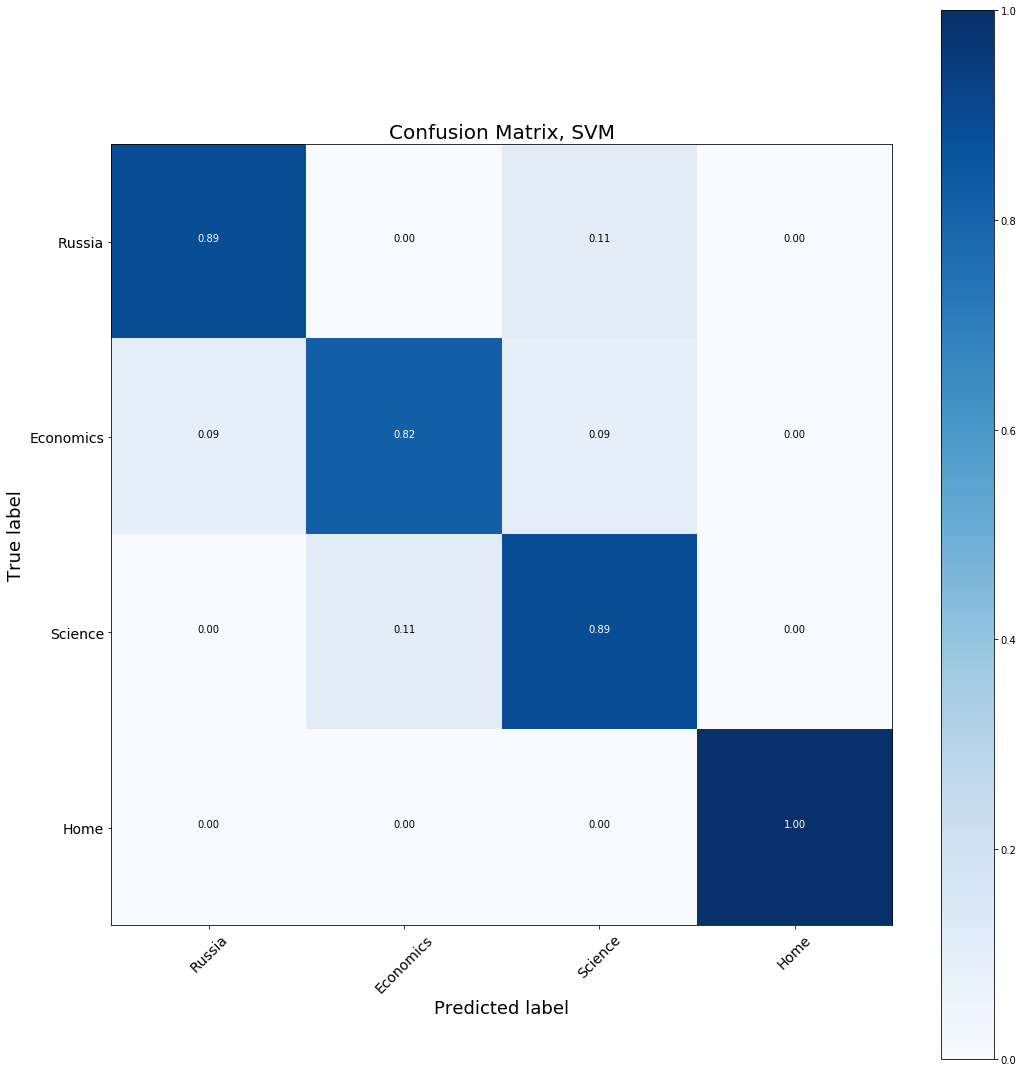

In [40]:
cmt_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cmt_svm, title='Confusion Matrix, SVM')

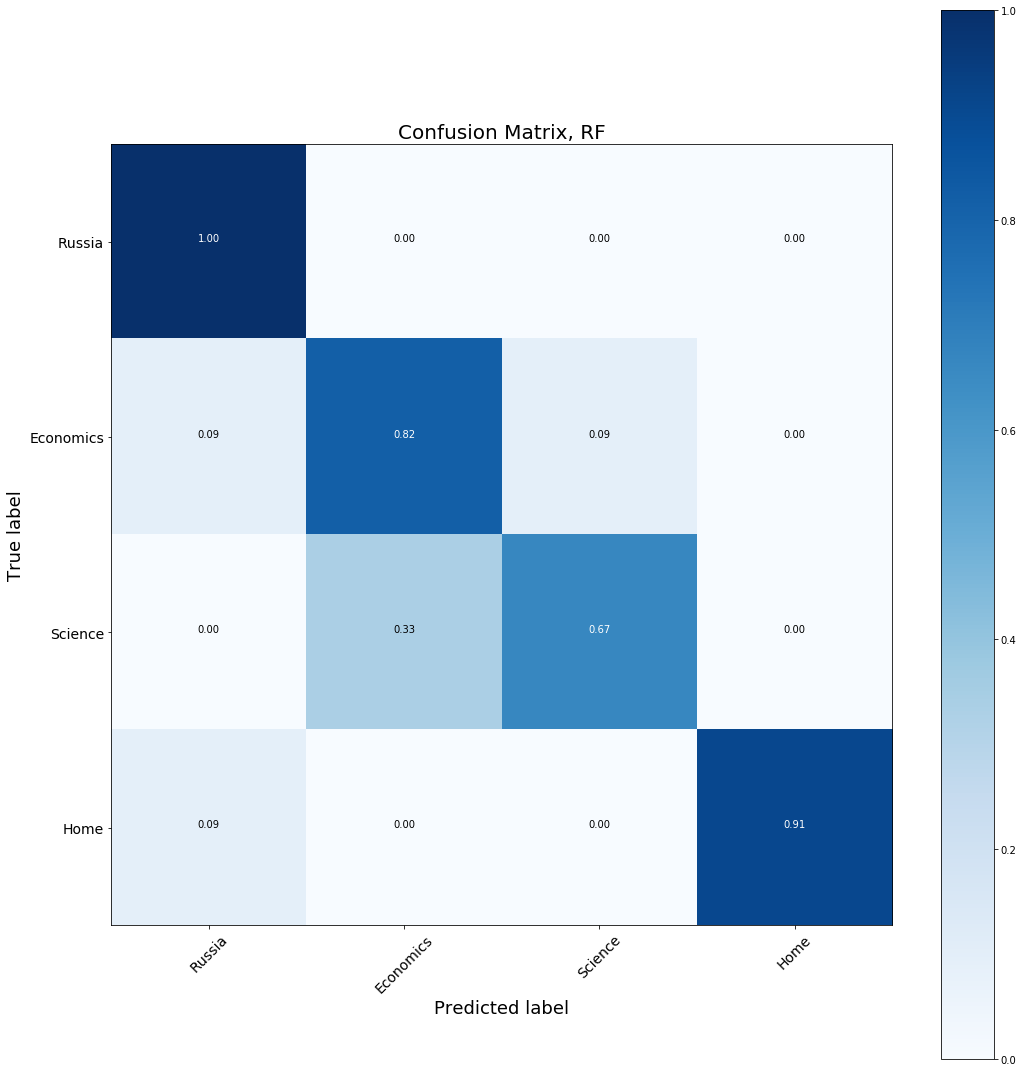

In [41]:
cmt_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cmt_rf, title='Confusion Matrix, RF')

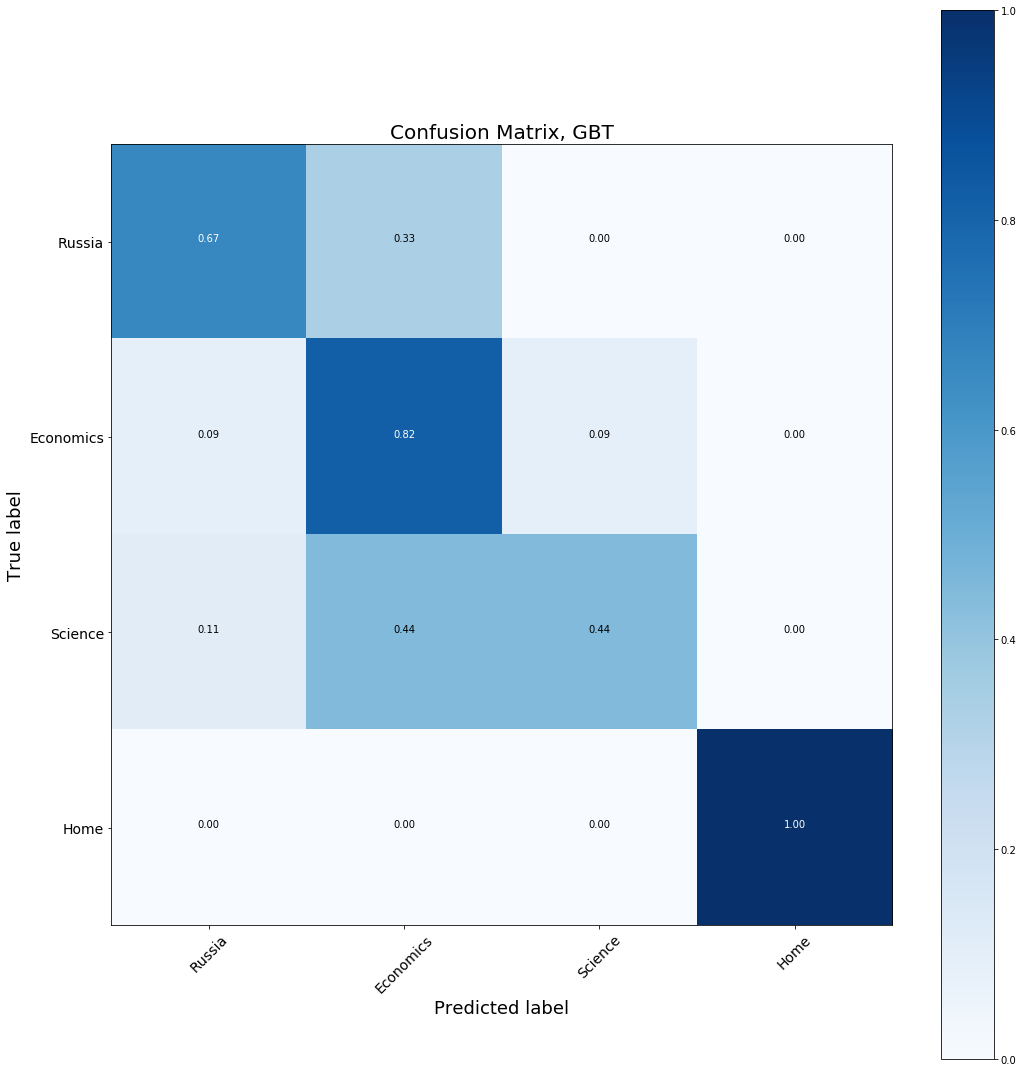

In [42]:
cmt_gbt = confusion_matrix(y_test, y_pred_gbt)
plot_confusion_matrix(cmt_gbt, title='Confusion Matrix, GBT')

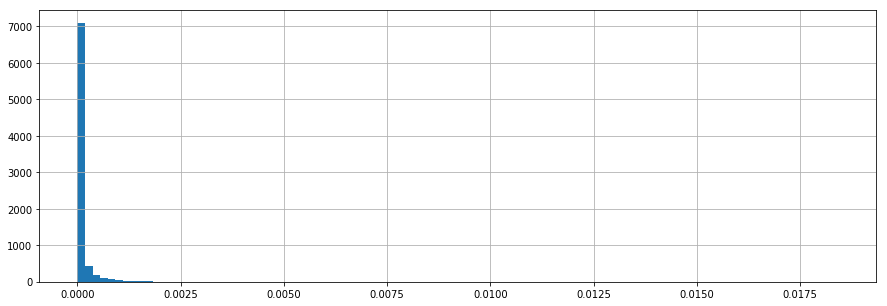

In [43]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)

(0, 0.001)

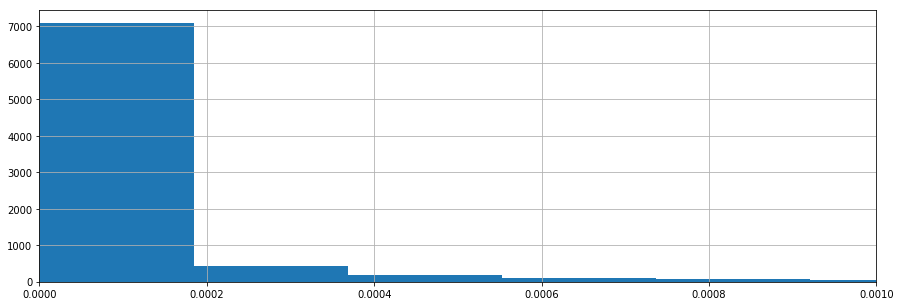

In [44]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)
plt.xlim(0, 0.001)

In [45]:
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=10)).fit(X_train, y_train)

In [46]:
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

print (X_train_transformed.shape, X_test_transformed.shape)

(160, 353) (40, 353)


In [47]:
predictor_lr_ = LogisticRegression().fit(X_train_transformed, y_train)

In [48]:
y_pred_lr_ = predictor_lr_.predict(X_test_transformed)
print ('LR (with feature selection) accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr_), 2)))

LR (with feature selection) accuracy: 0.8%


In [49]:
predictor_oneVSall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [50]:
y_pred_onevsall = predictor_oneVSall.predict(X_test)
print ('One-VS-all accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsall), 2)))

One-VS-all accuracy: 0.9%


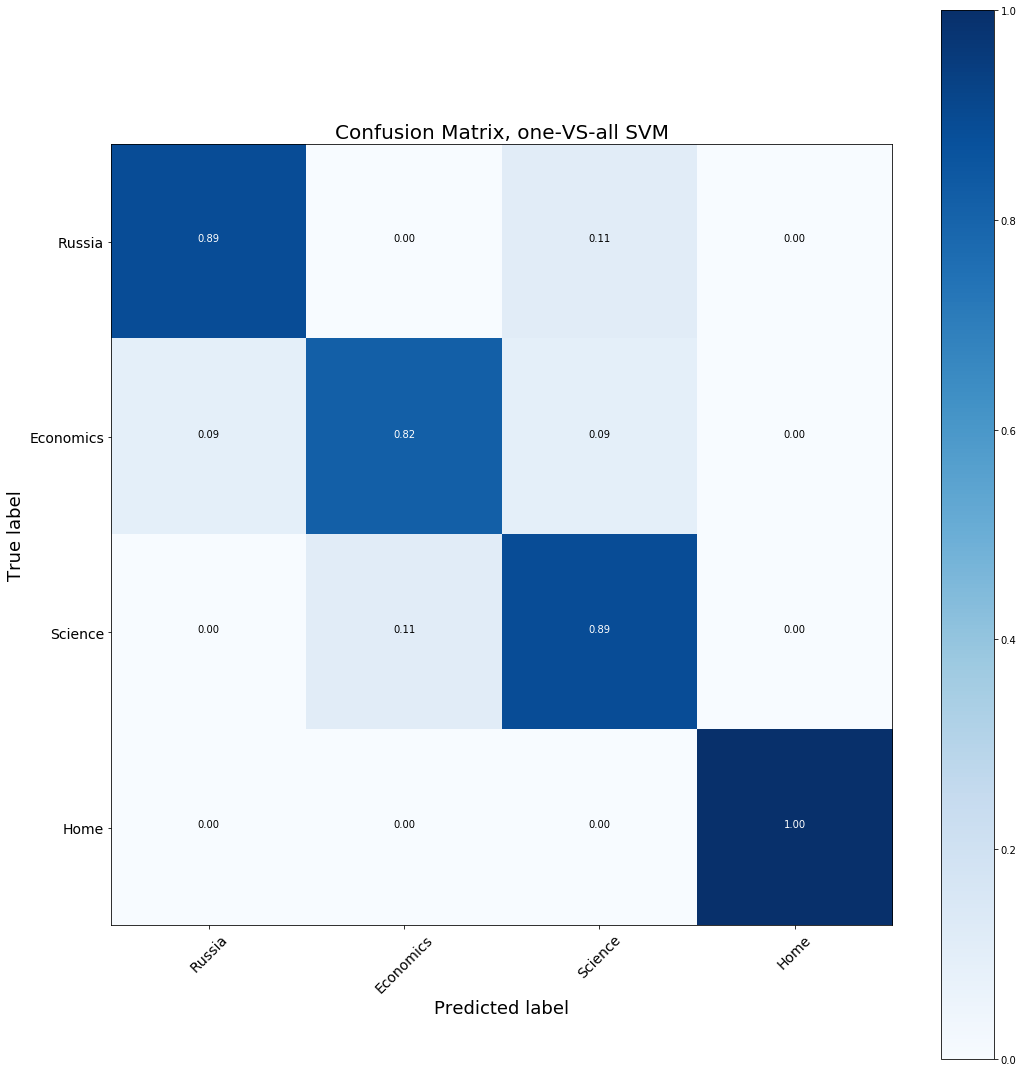

In [51]:
cmt_svm_onevsall = confusion_matrix(y_test, y_pred_onevsall)
plot_confusion_matrix(cmt_svm_onevsall, title='Confusion Matrix, one-VS-all SVM')

In [52]:
predictor_oneVSone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [53]:
y_pred_onevsone = predictor_oneVSone.predict(X_test)
print ('One-VS-one accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsone), 2)))

One-VS-one accuracy: 0.82%


In [54]:
y_pred_onevsone

array([2, 3, 0, 3, 2, 3, 0, 2, 3, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 3, 0,
       3, 3, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 3])

In [55]:
len(y_pred_onevsone)

40

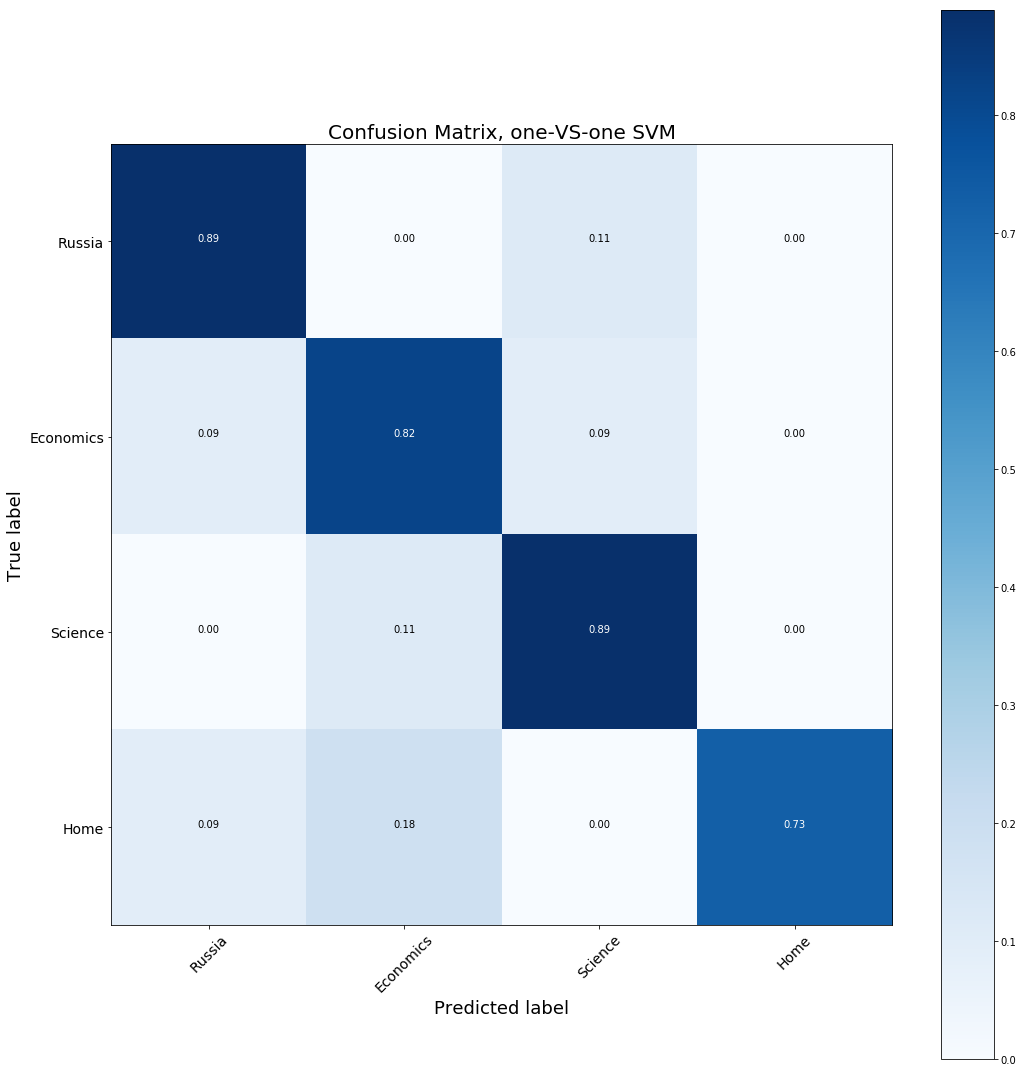

In [56]:
cmt_svm_onevsone = confusion_matrix(y_test, y_pred_onevsone)
plot_confusion_matrix(cmt_svm_onevsone, title='Confusion Matrix, one-VS-one SVM')

In [57]:
for c in np.unique(y_train):
    print ('Class \'{}\' samples N: {}'.format(c, y_train[y_train == c].shape[0]))

Class '0' samples N: 41
Class '1' samples N: 39
Class '2' samples N: 41
Class '3' samples N: 39


In [58]:
X_train_bin = X_train[(y_train == 1) | (y_train == 2)]
y_train_bin = y_train[(y_train == 1) | (y_train == 2)]

y_train_bin[y_train_bin == 1] = 0
y_train_bin[y_train_bin == 2] = 1

print(X_train_bin.shape, y_train_bin.shape)

(80, 8042) (80,)


In [59]:
X_test_bin = X_test[(y_test == 1) | (y_test == 2)]
y_test_bin = y_test[(y_test == 1) | (y_test == 2)]

y_test_bin[y_test_bin == 1] = 0
y_test_bin[y_test_bin == 2] = 1

print (X_test_bin.shape, y_test_bin.shape)

(20, 8042) (20,)


In [60]:
one_binary_predictor = RandomForestClassifier(n_estimators=100).fit(X_train_bin, y_train_bin)

In [61]:
y_pred_binary = one_binary_predictor.predict(X_test_bin)

print ('Binary classifiers accuracy: {}%'.format(round(np.mean(y_pred_binary == y_test_bin), 2)))

Binary classifiers accuracy: 0.85%


In [62]:
def FP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] != y_pred[y_true == 0]))

In [63]:
def TP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] == y_pred[y_true == 1]))

In [64]:
def FN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] != y_pred[y_true == 1]))

In [65]:
def TN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] == y_pred[y_true == 0]))

In [66]:
fp = FP(y_test_bin, y_pred_binary)
fn = FN(y_test_bin, y_pred_binary)
tp = TP(y_test_bin, y_pred_binary)
tn = TN(y_test_bin, y_pred_binary)

print ('TP = {}, FP = {}, TN = {}, FN = {}\n---------------------------------------------\nsum = {}'.format(tp, fp, tn, fn, tp + fp + tn + fn))

TP = 7.0, FP = 1.0, TN = 10.0, FN = 2.0
---------------------------------------------
sum = 20.0


In [67]:
P = precision_score(y_test_bin, y_pred_binary)
R = recall_score(y_test_bin, y_pred_binary)

print ('Precision: {}, Recall: {}'.format(P, R))

Precision: 0.875, Recall: 0.7777777777777778


In [68]:
print (tp / (tp + fp), tp / (tp + fn))

0.875 0.7777777777777778


In [69]:
print ('F1: {}'.format(f1_score(y_test_bin, y_pred_binary)))

F1: 0.823529411764706


In [70]:
print (2.0 * P * R / (P + R))

0.823529411764706


In [71]:
scores_binary = one_binary_predictor.predict_proba(X_test_bin)[:, 1]

print (scores_binary.shape)

(20,)


In [73]:
fpr, tpr, thresholds = roc_curve(y_test_bin, scores_binary)

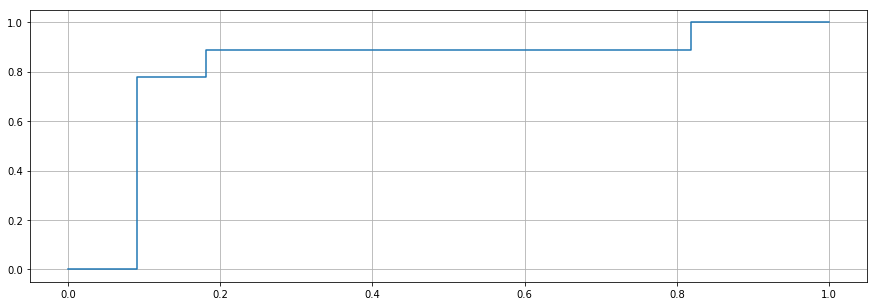

In [74]:
plt.figure(figsize=(15, 5))

inds = np.argsort(fpr)
plt.plot(fpr[inds], tpr[inds])
plt.grid(True)
#plt.xlim(-0.1, 1.1)
#plt.ylim(-0.1, 1.1)

In [75]:
roc_auc = roc_auc_score(y_test_bin, scores_binary)

print ('AUC score: {}'.format(roc_auc, 2))

AUC score: 0.8181818181818182


In [76]:
f1_max = 0
y_pred_best = None

for thr in thresholds:
    y_pred_tuned = scores_binary.copy()
    y_pred_tuned[y_pred_tuned < thr] = 0
    y_pred_tuned[y_pred_tuned >= thr] = 1
    
    f1 = f1_score(y_test_bin, y_pred_tuned)
    if f1 > f1_max:
        f1_max = f1
        y_pred_best = y_pred_tuned
    if f1 > 0.894308943089:
        print ('thr = {}: F1 +{}'.format(thr, round(f1 - 0.8920570264765784, 4)))
        
print()
print ('Max. F1: {}'.format(round(f1_max, 3)))


Max. F1: 0.842


C:\Users\root\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
print (np.mean(y_test_bin == y_pred_best))

0.85


In [78]:
print (np.mean(RandomForestClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(GradientBoostingClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))

0.7
0.85
0.775


In [79]:
ensemble_soft = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=1)

ensemble_hard = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)

In [80]:
ensemble_soft.fit(X_train, y_train)
ensemble_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_gini_10', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
          ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [81]:
y_pred_hard = ensemble_hard.predict(X_test)
y_pred_soft = ensemble_soft.predict(X_test)

print (y_pred_hard.shape, y_pred_soft.shape)

(40,) (40,)


C:\Users\root\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\root\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [82]:
print ('Hard voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_hard), 2)))
print ('Soft voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_soft), 2)))

Hard voting accuracy: 0.75%
Soft voting accuracy: 0.75%
